In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [ ]:
# Load the datasets
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train.columns
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Display the first few rows
print(train.head())

# Check for null values
print(train.isnull().sum())

# Summary of the dataset
print(train.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

In [ ]:
train.shape
test.shape

(418, 11)

In [ ]:
# Fill missing values
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train['Fare'].fillna(train['Fare'].median(), inplace=True)

# Convert categorical variables into dummy/indicator variables
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

# Drop columns that are not useful
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


<ipython-input-67-78c59ee63876>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
<ipython-input-67-78c59ee63876>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [ ]:
# Define features and target variable
X = train.drop(['Survived', 'PassengerId'], axis=1)
y = train['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the GBM model
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


Accuracy: 80.45%
Confusion Matrix:
 [[94 11]
 [24 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



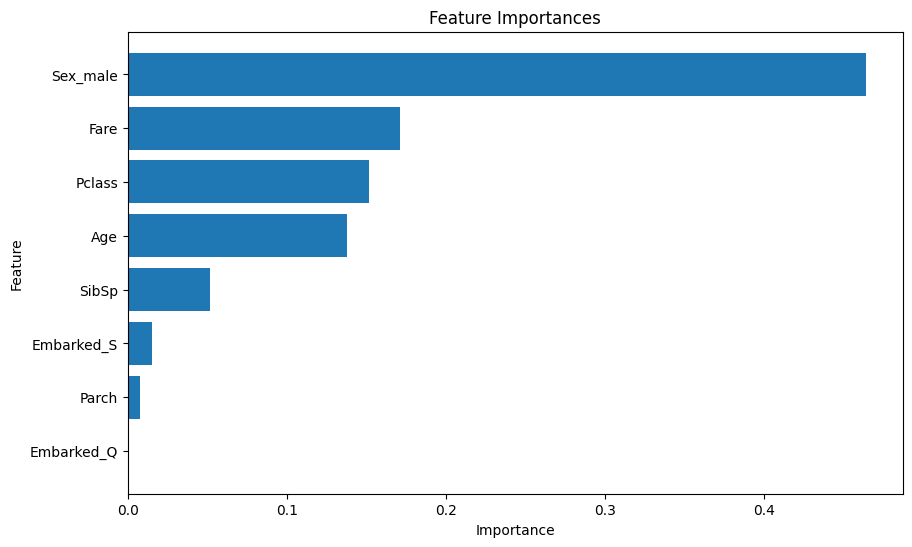

In [ ]:
# Plot feature importances
feature_importances = model.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


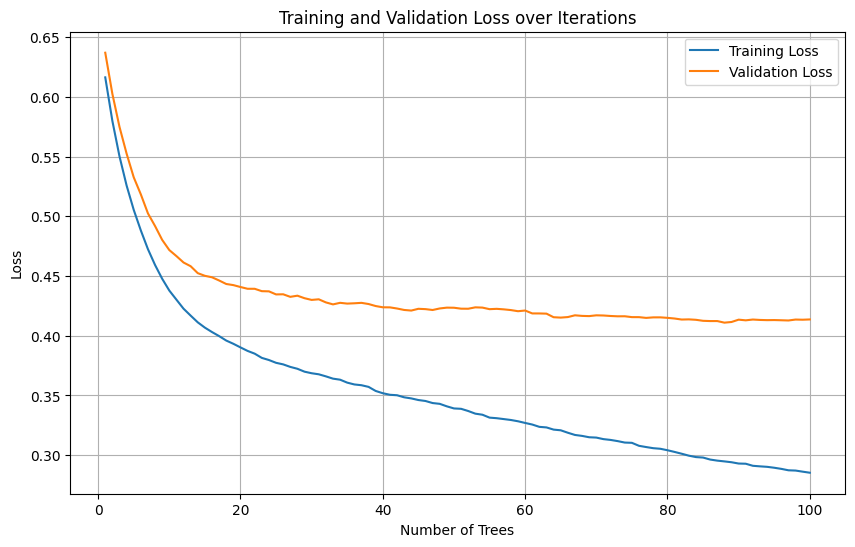

In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Load the Titanic dataset
train = pd.read_csv('train.csv')

# Display column names
print(train.columns)

# Fill missing values without inplace
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Fare'] = train['Fare'].fillna(train['Fare'].median())

# Convert categorical variables into dummy/indicator variables
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

# Drop columns that are not useful
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Define features and target variable
X = train.drop(['Survived', 'PassengerId'], axis=1)
y = train['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GBM model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model while storing the training and validation loss
model.fit(X_train, y_train)

# Extract the staged probabilities for training and validation sets
train_loss = np.zeros(model.n_estimators, dtype=np.float64)
val_loss = np.zeros(model.n_estimators, dtype=np.float64)

for i, y_pred_prob in enumerate(model.staged_predict_proba(X_train)):
    train_loss[i] = log_loss(y_train, y_pred_prob)

for i, y_pred_prob in enumerate(model.staged_predict_proba(X_val)):
    val_loss[i] = log_loss(y_val, y_pred_prob)

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(np.arange(model.n_estimators) + 1, train_loss, label='Training Loss')
plt.plot(np.arange(model.n_estimators) + 1, val_loss, label='Validation Loss')
plt.xlabel('Number of Trees')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Iterations')
plt.legend()
plt.grid(True)
plt.show()


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
Best Model Accuracy: 0.84
Validation Accuracy: 0.81
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_max_depth', 'param_min_samples_split',
       'param_n_estimators', 'param_subsample', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


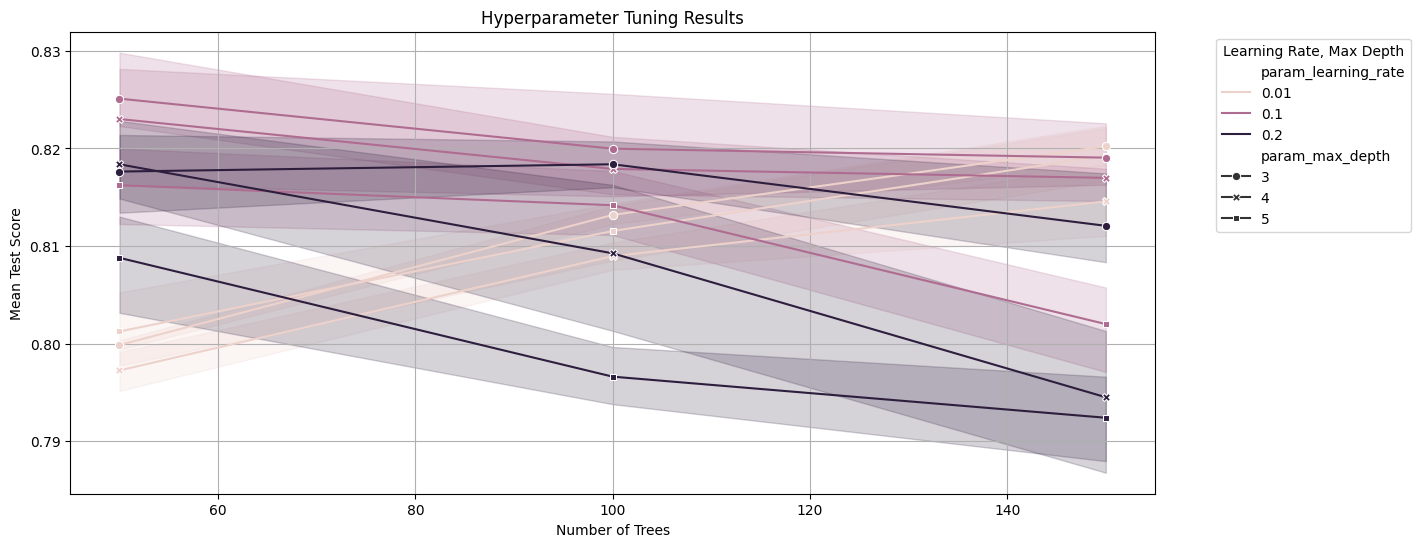

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Importing seaborn

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train and y_train are already defined

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
}

# Initialize the GBM model
model = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Best hyperparameters and model performance
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best Hyperparameters: {best_params}')
print(f'Best Model Accuracy: {grid_search.best_score_:.2f}')

# Evaluate the best model on the validation set
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)
print(results.columns)  # Check the column names

# Plot the results
plt.figure(figsize=(14, 6))
sns.lineplot(data=results, x='param_n_estimators', y='mean_test_score', hue='param_learning_rate', style='param_max_depth', markers=True, dashes=False)
plt.title('Hyperparameter Tuning Results')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Test Score')
plt.legend(title='Learning Rate, Max Depth', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Fill missing values
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Fare'] = train['Fare'].fillna(train['Fare'].median())

# Convert categorical variables into dummy/indicator variables
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

# Drop columns that are not useful
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Define features and target variable
X = train.drop(['Survived', 'PassengerId'], axis=1)
y = train['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)


In [94]:
from sklearn.utils import resample

# Create bootstrap samples
n_bootstraps = 100
bootstrap_samples = [resample(X_train, y_train, replace=True, random_state=i) for i in range(n_bootstraps)]


In [95]:
# Initialize dictionaries to store held-out errors
held_out_errors = {
    'linear': [],
    'spline': [],
    'stump': [],
    'tree': []
}

# Fit models and compute held-out errors
for X_boot, y_boot in bootstrap_samples:
    # Linear GBM
    linear_model = GradientBoostingClassifier(max_depth=1, learning_rate=0.1, random_state=42)
    linear_model.fit(X_boot, y_boot)
    linear_pred = linear_model.predict(X_val)
    held_out_errors['linear'].append(log_loss(y_val, linear_pred))

    # Spline GBM (using max_depth=2 as a proxy for spline)
    spline_model = GradientBoostingClassifier(max_depth=2, learning_rate=0.1, random_state=42)
    spline_model.fit(X_boot, y_boot)
    spline_pred = spline_model.predict(X_val)
    held_out_errors['spline'].append(log_loss(y_val, spline_pred))

    # Stump-based GBM
    stump_model = GradientBoostingClassifier(max_depth=1, n_estimators=50, learning_rate=0.1, random_state=42)
    stump_model.fit(X_boot, y_boot)
    stump_pred = stump_model.predict(X_val)
    held_out_errors['stump'].append(log_loss(y_val, stump_pred))

    # Tree-based GBM with interaction depth d = 4
    tree_model = GradientBoostingClassifier(max_depth=4, learning_rate=0.1, random_state=42)
    tree_model.fit(X_boot, y_boot)
    tree_pred = tree_model.predict(X_val)
    held_out_errors['tree'].append(log_loss(y_val, tree_pred))


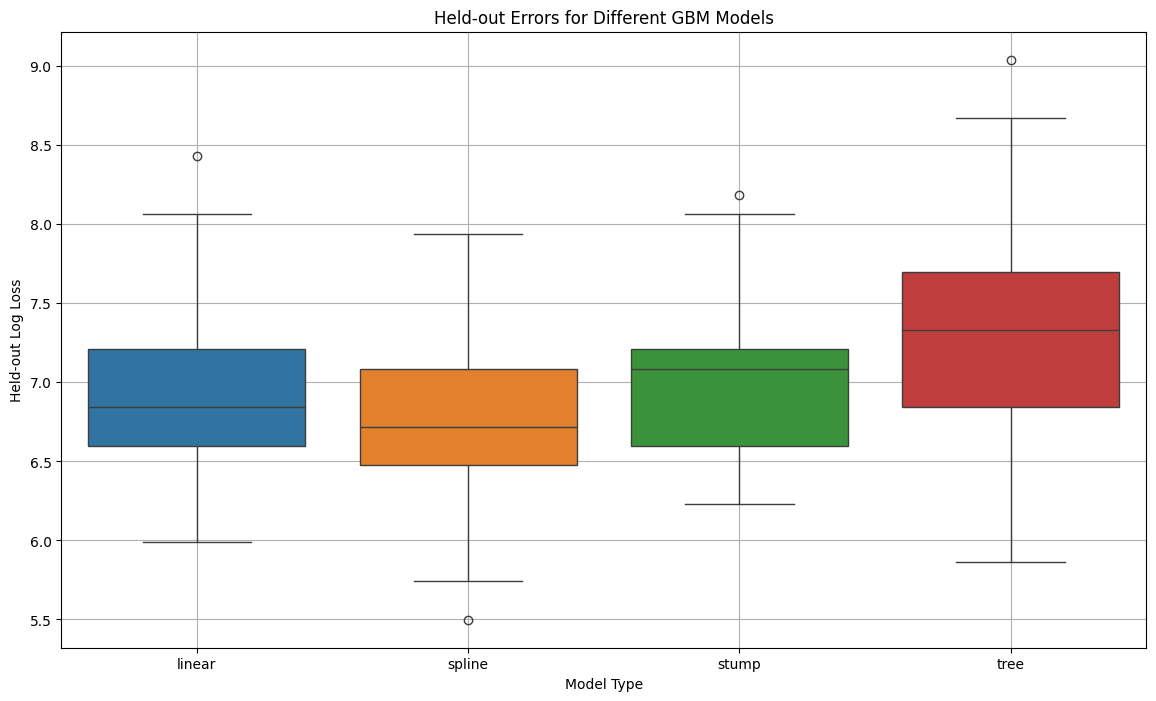

In [96]:
# Convert held-out errors to DataFrame for plotting
errors_df = pd.DataFrame(held_out_errors)

# Plot the held-out errors
plt.figure(figsize=(14, 8))
sns.boxplot(data=errors_df)
plt.xlabel('Model Type')
plt.ylabel('Held-out Log Loss')
plt.title('Held-out Errors for Different GBM Models')
plt.grid(True)
plt.show()


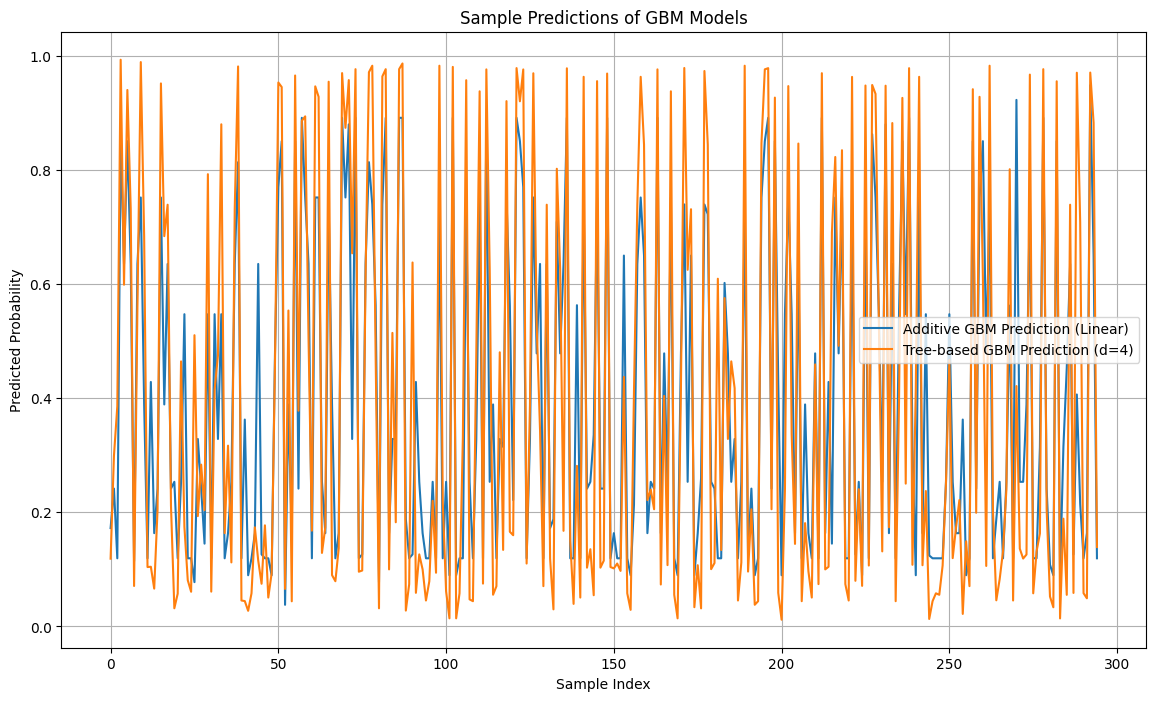

In [97]:
# Sample prediction for additive (linear) GBM
linear_model.fit(X_train, y_train)
linear_pred_sample = linear_model.predict_proba(X_val)[:, 1]

# Sample prediction for tree-based GBM with d=4
tree_model.fit(X_train, y_train)
tree_pred_sample = tree_model.predict_proba(X_val)[:, 1]

# Plot sample predictions
plt.figure(figsize=(14, 8))
plt.plot(linear_pred_sample, label='Additive GBM Prediction (Linear)')
plt.plot(tree_pred_sample, label='Tree-based GBM Prediction (d=4)')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Sample Predictions of GBM Models')
plt.legend()
plt.grid(True)
plt.show()


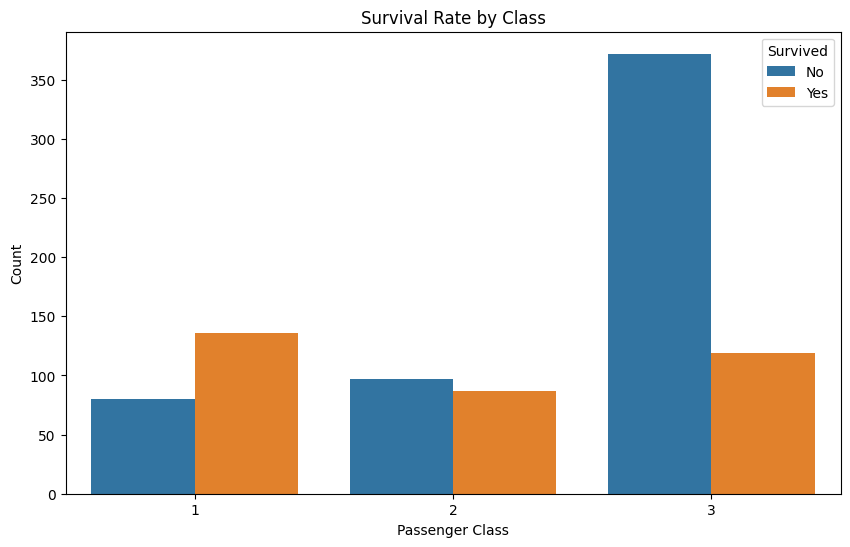

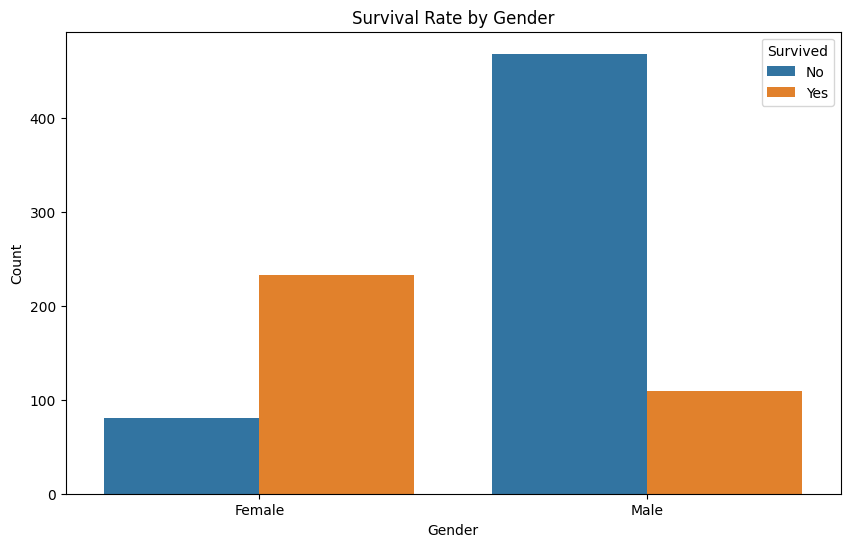

In [98]:
# Plot survival rate by class and gender
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='Sex_male', hue='Survived')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


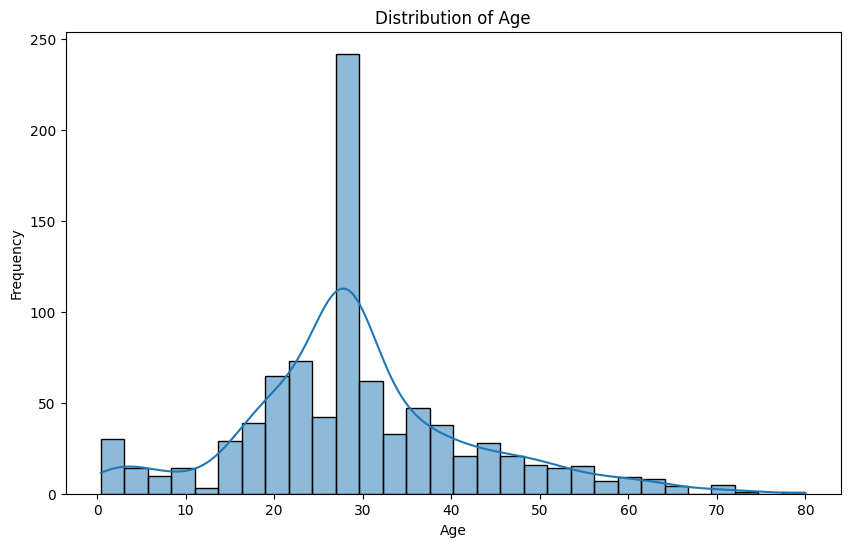

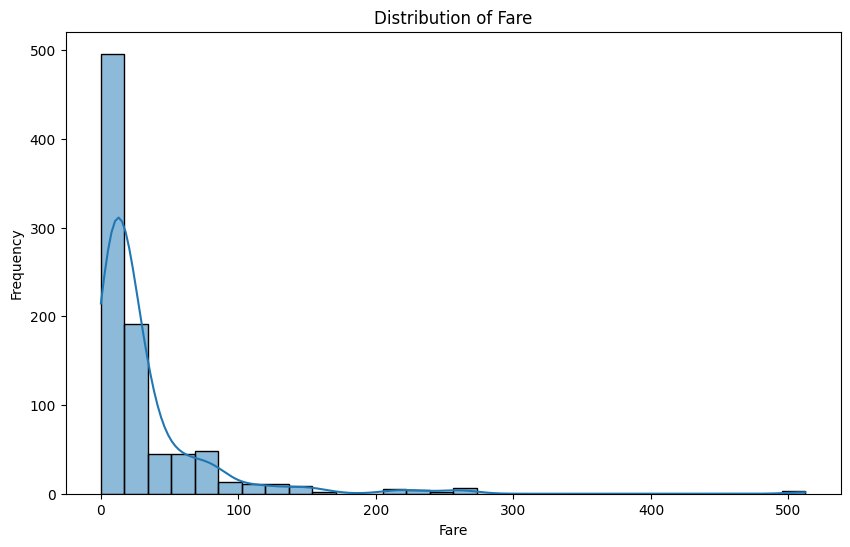

In [99]:
# Plot distribution of Age and Fare
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train['Fare'], kde=True, bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


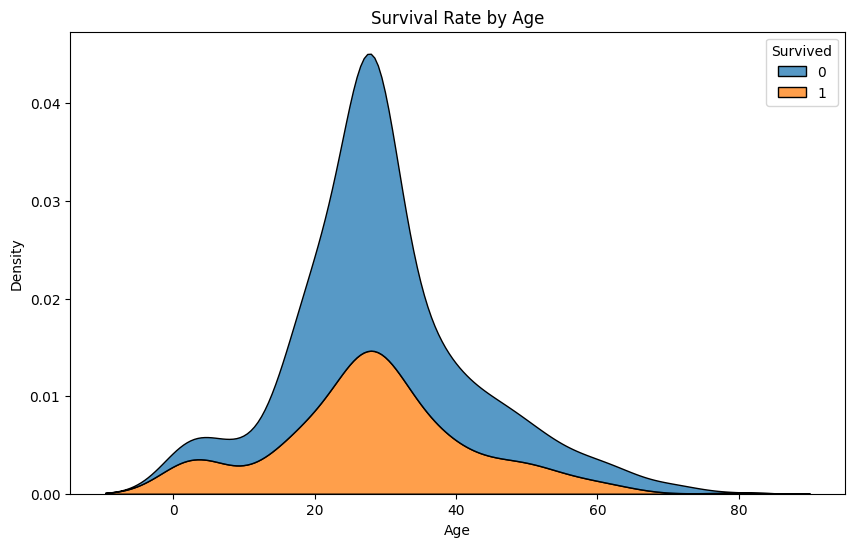

In [100]:
# Plot survival rate by Age
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train, x='Age', hue='Survived', multiple='stack')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()
